<a href="https://colab.research.google.com/github/lauraemmanuella/AprendizadoMaquina/blob/main/6_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#monte o drive caso precise usar/salvar arquivos do seu drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#mude o ponto de execução para outro diretório, caso deseje
%cd /content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina

/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina


In [3]:
from IPython.display import Image

# Métodos Probabilísticos
   
   https://scikit-learn.org/stable/modules/naive_bayes.html
   
   https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
   
   https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
   
   https://www.vooo.pro/insights/6-passos-faceis-para-aprender-o-algoritmo-naive-bayes-com-o-codigo-em-python/
   
   Outra forma de lidar com tarefas preditivas em AM, é por meio de métodos probabilísticos. Esses métodos utilizam **modelos estatísticos** para encontrar uma boa aproximação do domínio que se deseja aprender. 
   
   Entre os modelos estatísticos destaca-se o de aprendizado bayesiano, **naive bayes**, que faz uso de fórmulas estatísticas e cálculo de probabilidades para realizar a classificação. 
   
   O classificador naive bayes possui aprendizado supervisionado e baseia-se na aplicação do teorema de bayes, equação abaixo, para o cálculo das probabilidades necessárias à classificação. 
   
   **Para calcular a classe mais provável de uma amostra, calcula-se a probabilidade de todas as possíveis classes e, no fim, escolhe-se a classe com maior probabilidade como rótulo para essa amostra que está sendo classificada.**

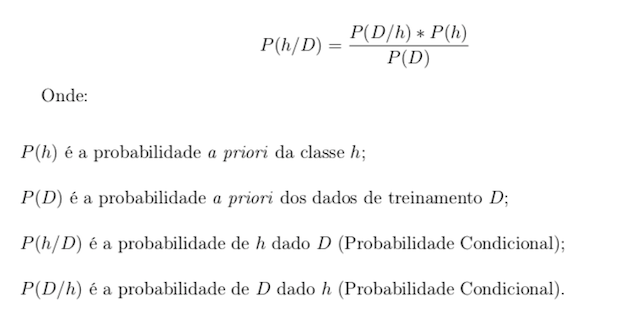

In [ ]:
Image('./img/naive.png')

O cálculo de P(D) pode ser ignorado, uma vez que é o mesmo para todas as classes

### Exemplo

Um médico sabe que a meningite causa rigidez de nuca 50% das vezes

* Probabilidade a priori de qualquer paciente ter meningite: 1/50000
* Probabilidade a priori de qualquer paciente ter rigidez de nuca: 1/20

Se um paciente tem rigidez de nuca (evidência), qual é a probabilidade a posteriori de ele ter meningite?

Considere que M = meningite e R = Rigidez de nuca

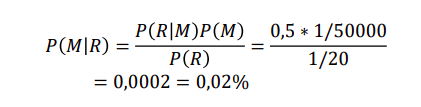

In [ ]:
Image('./img/exemplomeningite.png')

## O classificador Naive Bayes

   O classificador Naive Bayes assume que o efeito de um atributo específico sobre uma classe é independente dos outros atributos. 
   
   Por isso, é denominado Naive (ingênuo), pois assume que os atributos são condicionalmente independentes, ou seja, a informação de um atributo não é informativa sobre nenhum outro.
   
   Por exemplo, um solicitante de empréstimo é desejável ou não dependendo de sua renda, histórico de empréstimos e transações anteriores, idade e localização. Mesmo se esses atributos forem interdependentes, eles serão considerados independentes. Essa suposição simplifica a computação e é por isso que é considerada ingênua (naive). Essa suposição é chamada de **independência condicional de classe**.

## Distribuição de probabilidade condicional

Frequência com que encontramos determinado valor do atributo para cada classe

Na fórmula do Teorema de Bayes apresentada acima seria o P(D/h), ou seja, a probabilidade de a amostra possuir determinado valor para os atributos quando ela é de determinada classe



### **Distribuição discreta**

Para os casos de atributos categóricos, calcula-se a probabilidade de ocorrer determinado valor para o atributo, quando a amostra é de uma classe, como no exemplo abaixo:

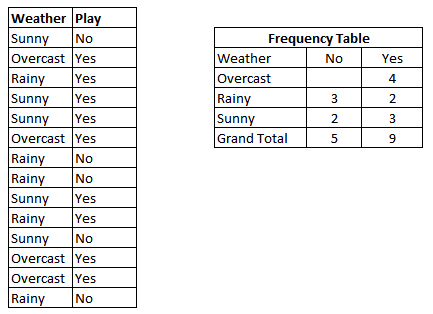

In [4]:
Image('./img/Bayes_frequency.png')

Qual a probabilidade do atributo Weather ter o valor Sunny quando a amostra é da classe No?

P(Sunny/No) = 2/5 = 0,4

Qual a probabilidade do atributo Weather ter o valor Sunny quando a amostra é da classe Yes?

P(Sunny/Yes) = 3/9 = 0,33


### **Distribuição contínua**

Quando os atributos são contínuos e a probabilidade de ocorrência de um atributo não pode ser calculada pela sua frequência (como acima), pode-se usar uma **função de densidade de probabilidade** que faz o cálculo da probabilidade a partir da média e desvio padrão do atributo.

Na imagem abaixo, podemos verificar a probabilidade do atributo assumir determinado valor quando ele é de cada uma das classes

* Probabilidade do atributo x possuir valor 11, quando a amostra é da classe w1

> P(x=11/w1) = 0.18

* Probabilidade do atributo x possuir valor 11, quando a amostra é da classe w2

> P(x=11/w2) = 0.3

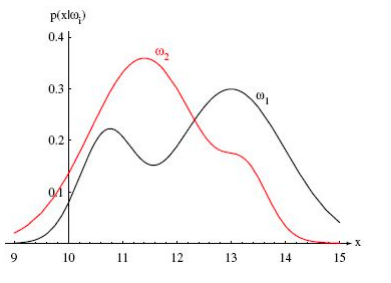

In [ ]:
Image('./img/densidade.png')

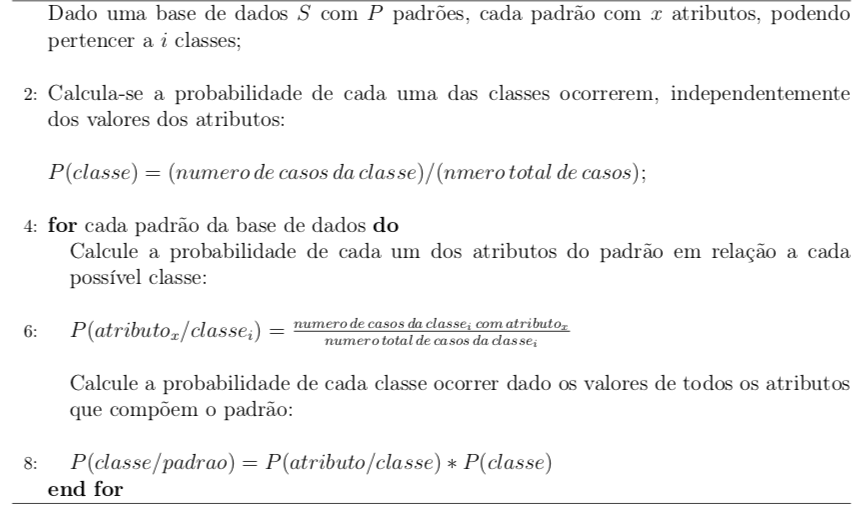

In [ ]:
Image('./img/algoritmoNaive.png')

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
dfIris = pd.read_csv('./bases/iris.csv')

In [ ]:
dfIris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#dividindo a base para um teste simples por enquanto
X_train, X_test, y_train, y_test = train_test_split(dfIris.drop(columns=['class']), dfIris['class'],test_size=0.33, stratify=dfIris['class'])

In [ ]:
#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
pred = model.predict(X_test)

print(metrics.classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.94      0.97        17

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



## Problema da probabilidade zero

**Problema**: determinado valor não aparece no treinamento, mas aparece no teste.

Se a variável categórica tem uma categoria (no conjunto de dados de teste) que não foi observada no conjunto de dados de treinamento, então o modelo irá atribuir uma probabilidade de 0 (zero) e não será capaz de fazer uma previsão. Isso é muitas vezes conhecido como “Zero Frequency”. Para resolver isso, podemos usar a técnica de suavização “Estimador de Laplace”.

**Ideia**: adicionar 1 unidade fictícia para cada combinação de valor-classe

Resultados
* Valores sem exemplos de treinamento passam a conter 1 exemplo
* As probabilidades nunca serão zero

## Valores ausentes

**Problema**: O que fazer se uma amostra não tiver o valor de um atributo?

No treinamento:
    
  * Excluir a amostra do conjunto de treinamento

Na classificação:
    
  * Considerar apenas os demais atributos

Outra observação é que o naive não faz regressão, apenas classificação.

## Vantagens

* Robusto à ruídos (os outliers afetam pouco o cálculo das probabilidades)
* Robusto à atributos irrelevantes (esses atributos afetam pouco as probabilidades relativas às classes)
* Apesar de suas suposições aparentemente simplificadas, os classificadores Naive Bayes têm funcionado muito bem em muitas situações do mundo real, notadamente a classificação de documentos e a filtragem de spam. Eles exigem uma pequena quantidade de dados de treinamento para estimar os parâmetros necessários. 

## Desvantagens

* Desempenho pode ser afetado pela presença de atributos correlacionados ou redundantes (pois se baseia na ideia de que os atributos são independentes)
* Desempenho pode ser afetado quando os atributos não tem distribuição normal

## Dicas para melhorar o uso do Naive Bayes

* Se os atributos contínuos não têm distribuição normal, devemos aplicar uma transformação para convertê-los na distribuição normal.
* Remova atributos correlacionados, pois as características altamente correlacionadas são consideradas duas vezes no modelo e podem levar a um excesso de importância.
* Classificadores Naive Bayes têm opções limitadas para ajuste de parâmetros como o valor da suavizacão e as probabilidades a priori das classes (quando não quiser que o algoritmo calcule a partir dos dados). 

**Recomenda-se focar no pré-processamento de dados e seleção de atributos.**